In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'],test_size=0.2,random_state=0)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [167]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [168]:
X_train.describe()

,Age,EstimatedSalary
count,320.00000,320.000000
mean,38.21875,69928.125000
std,10.30304,34570.057299
min,18.00000,15000.000000
25%,30.00000,43000.000000
50%,38.00000,69500.000000
75%,46.00000,88000.000000
max,60.00000,150000.000000


# Standard Scaller

In [179]:
from sklearn.preprocessing import  StandardScaler
 
scaler = StandardScaler()

X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [180]:
X_train_scalled = pd.DataFrame(X_train_scalled, columns=X_train.columns)
X_test_scalled = pd.DataFrame(X_test_scalled, columns=X_test.columns)

In [181]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [182]:
X_train_scalled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


# Effect of scalling

Text(0.5, 1.0, 'After Scaling')

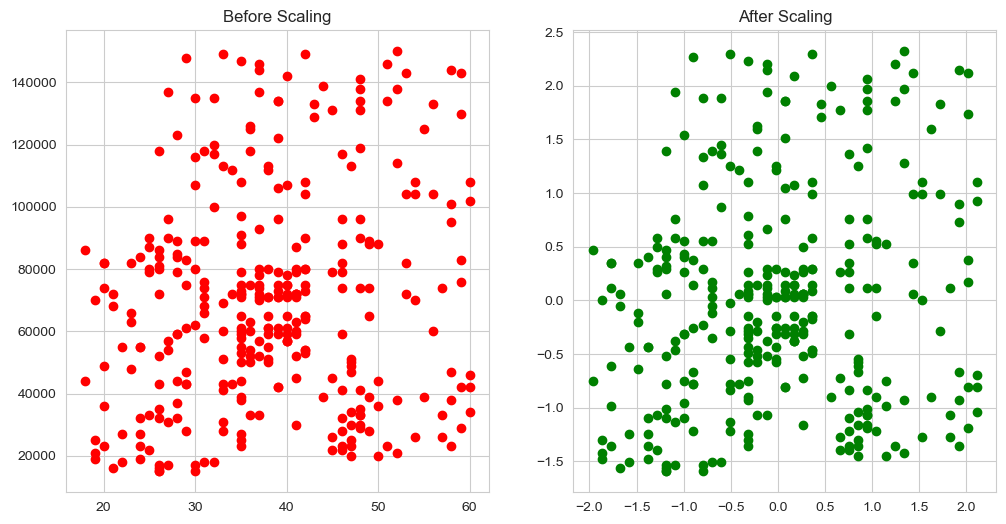

In [183]:
fig, axes = plt.subplots(nrows= 1,ncols=2,figsize=(12,6))

axes[0].scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
axes[0].set_title("Before Scaling")
axes[1].scatter(X_train_scalled['Age'],X_train_scalled['EstimatedSalary'],color='green')
axes[1].set_title("After Scaling")

# Comparison of distribution

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

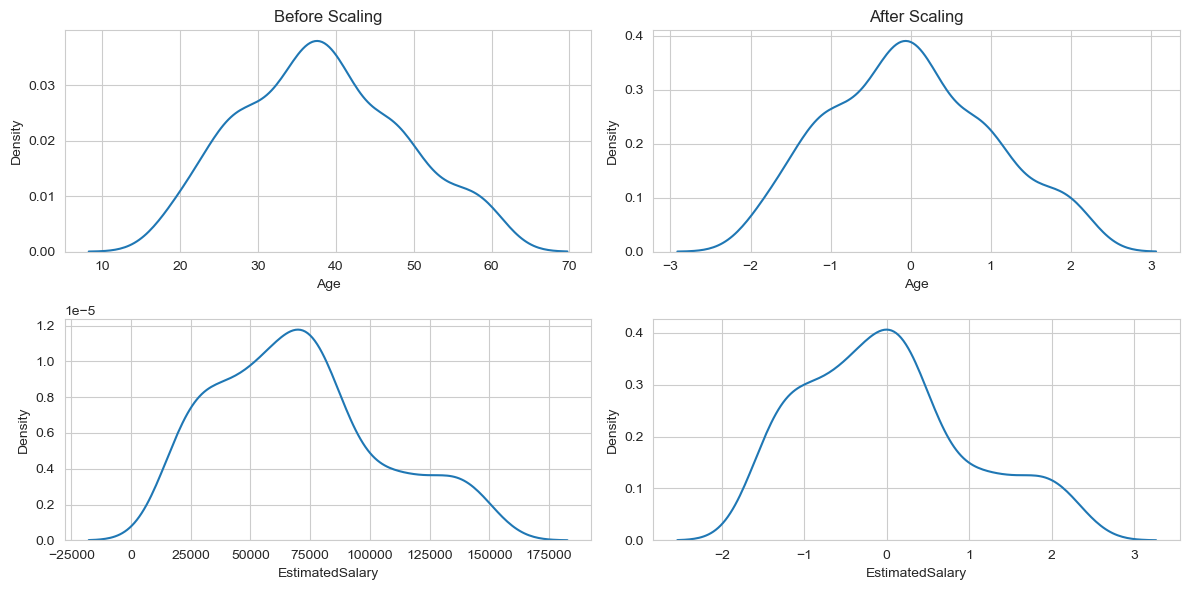

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

axes[0,0].set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=axes[0, 0])
axes[0,1].set_title("After Scaling")
sns.kdeplot(X_train_scalled['Age'], ax=axes[0, 1])
sns.kdeplot(X_train['EstimatedSalary'], ax=axes[1, 0])
sns.kdeplot(X_train_scalled['EstimatedSalary'], ax=axes[1, 1])

plt.tight_layout()
plt.show()


In [185]:
y_test.shape

(80,)

# Effect in regression

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.725

In [189]:
lr_scalled = LogisticRegression()
lr_scalled.fit(X_train_scalled,y_train)
y_pred_scalled = lr_scalled.predict(X_test_scalled)
accuracy_score(y_test,y_pred_scalled)

0.925

In [ ]:
# On use in decision tree